# House Price Prediction using Machine Learning

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

### Loading Dataset

#### reading the data

In [4]:
df = pd.read_csv(r'C:\Users\saloni\Desktop\mumbai.csv')
df.head()

,area,bathroom_num,bedroom_num,city,desc,dev_name,floor_count,floor_num,furnishing,id,...,longitude,post_date,poster_name,price,project,title,trans,type,url,user_type
0,350.0,2.0,1,Mumbai,"2 Bath,Unfurnished,East facing The project has...",NaN,NaN,NaN,Unfurnished,45349857,...,72.825882,11-01-2020,Saurabh Patil,9000,NaN,1 BHK Apartment for Rent in Malad West,Rent,Apartment,/propertyDetails/1-BHK-350-Sq-ft-Multistorey-A...,Agent
1,652.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,East facing A 1BHK apart...",Veena Group,NaN,NaN,Semi-Furnished,45960973,...,72.833592,11-01-2020,Gorakh Chavan,8060,Veena Dynasty,"1 BHK Apartment for Rent in Veena Dynasty, Vasai",Rent,Apartment,/propertyDetails/1-BHK-652-Sq-ft-Multistorey-A...,Agent
2,635.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,4 floor,West facing A be...",Agarwal Group,7.0,4.0,Semi-Furnished,46688849,...,72.801612,13-12-2019,Lokesh Joshi,8000,Agarwal Lifestyle,"1 BHK Apartment for Rent in Agarwal Lifestyle,...",Rent,Apartment,/propertyDetails/1-BHK-635-Sq-ft-Multistorey-A...,Agent
3,540.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,East facing Essential Se...",NaN,NaN,NaN,Semi-Furnished,44696119,...,72.836006,13-01-2020,Sajith Thomas,8000,NaN,1 BHK Apartment for Rent in Vasai East,Rent,Apartment,/propertyDetails/1-BHK-540-Sq-ft-Multistorey-A...,Agent
4,625.0,1.0,1,Mumbai,"1 Bath,Furnished,2 floor,North facing 24 hours...",Millennium Group,7.0,2.0,Furnished,46742851,...,72.850167,17-12-2019,Charmaine Gomez,9000,Mittal Enclave,"1 BHK Apartment for Rent in Mittal Enclave, Na...",Rent,Apartment,/propertyDetails/1-BHK-625-Sq-ft-Multistorey-A...,Owner


# understand the data

#### Get the no of rows and columns

In [5]:
df.shape

(34348, 23)

#### Get all the column names

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34348 entries, 0 to 34347
Data columns (total 23 columns):
area            33572 non-null float64
bathroom_num    34334 non-null float64
bedroom_num     34348 non-null int64
city            34348 non-null object
desc            34338 non-null object
dev_name        17349 non-null object
floor_count     31488 non-null float64
floor_num       31567 non-null float64
furnishing      34338 non-null object
id              34348 non-null int64
id_string       34348 non-null object
latitude        34348 non-null float64
locality        34140 non-null object
longitude       34348 non-null float64
post_date       34348 non-null object
poster_name     34347 non-null object
price           34348 non-null int64
project         20179 non-null object
title           34338 non-null object
trans           34318 non-null object
type            34348 non-null object
url             34338 non-null object
user_type       34348 non-null object
dtypes: float6

#### getting statistical summary of the Series and DataFrame.

In [7]:
df.describe()

,area,bathroom_num,bedroom_num,floor_count,floor_num,id,latitude,longitude,price
count,33572.000000,34334.000000,34348.000000,31488.000000,31567.000000,3.434800e+04,34348.000000,34348.000000,3.434800e+04
mean,1177.387704,2.199278,2.076686,17.403551,8.577850,4.292717e+07,13.963273,52.420100,7.149190e+04
std,682.924385,0.880150,0.899821,13.996063,7.770904,6.954479e+06,9.131194,32.689143,7.717099e+04
min,10.000000,1.000000,1.000000,2.000000,-2.000000,2.074068e+06,0.000000,0.000000,2.200000e+03
25%,690.000000,2.000000,1.000000,7.000000,3.000000,4.249600e+07,0.000000,0.000000,3.200000e+04
50%,1040.000000,2.000000,2.000000,14.000000,6.000000,4.601324e+07,19.074359,72.839302,5.000000e+04
75%,1400.000000,3.000000,3.000000,22.000000,11.000000,4.678029e+07,19.150385,72.878328,8.000000e+04
max,9500.000000,8.000000,5.000000,120.000000,95.000000,4.733486e+07,73.071373,80.191436,1.200000e+06


#### column labels of the given Dataframe.

In [8]:
df.columns

Index(['area', 'bathroom_num', 'bedroom_num', 'city', 'desc', 'dev_name',
       'floor_count', 'floor_num', 'furnishing', 'id', 'id_string', 'latitude',
       'locality', 'longitude', 'post_date', 'poster_name', 'price', 'project',
       'title', 'trans', 'type', 'url', 'user_type'],
      dtype='object')

#### Drop features that are not required to build our model1

In [9]:
df1 = df.drop(['city','desc','dev_name','floor_count', 'floor_num', 'id', 'id_string','post_date', 'poster_name','project','title', 'trans', 'type', 'url', 'latitude','longitude'],axis='columns')
df1.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner


# Data Cleaning:Check for na values

#### Verify unique values of each column & print unique values of each column


In [10]:
unique = df1.nunique(dropna=False)
print(unique)

area            1626
bathroom_num       9
bedroom_num        5
furnishing         4
locality         828
price            805
user_type          3
dtype: int64


# Handling null values

#### Get the sum of all na values from dataset

In [11]:
df1.isnull().sum()
df1.head(30)


,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner
5,630.0,2.0,1,Unfurnished,Virar West,8000,Agent
6,690.0,2.0,1,Furnished,Virar,8500,Agent
7,338.0,1.0,1,Unfurnished,Royal Palms Estate,10000,Agent
8,675.0,2.0,1,Furnished,Virar,9000,Agent
9,500.0,1.0,1,Semi-Furnished,Virar West,8000,Agent


In [12]:
df2 = df1.dropna()
df2.isnull().sum()
df2.shape
df2.head(30)

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner
5,630.0,2.0,1,Unfurnished,Virar West,8000,Agent
6,690.0,2.0,1,Furnished,Virar,8500,Agent
7,338.0,1.0,1,Unfurnished,Royal Palms Estate,10000,Agent
8,675.0,2.0,1,Furnished,Virar,9000,Agent
9,500.0,1.0,1,Semi-Furnished,Virar West,8000,Agent


# using seaborn for data selection

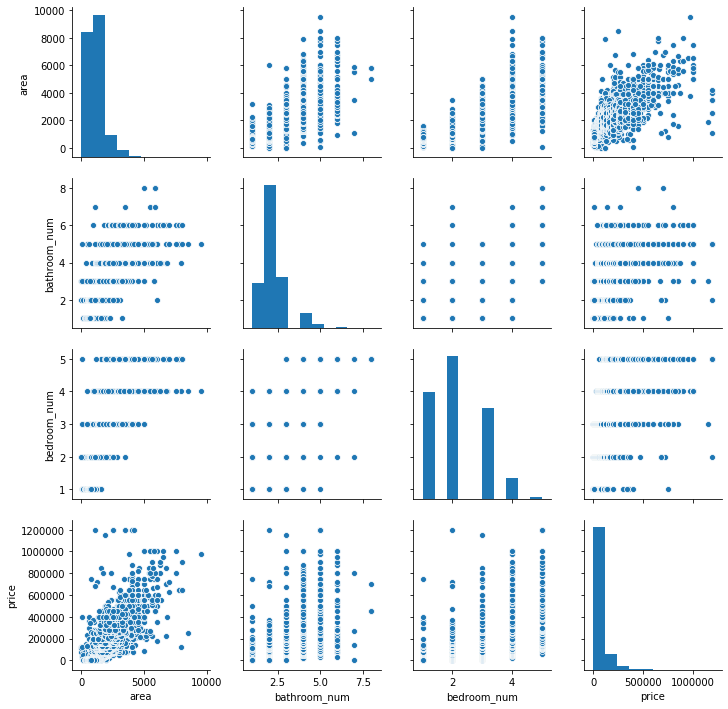

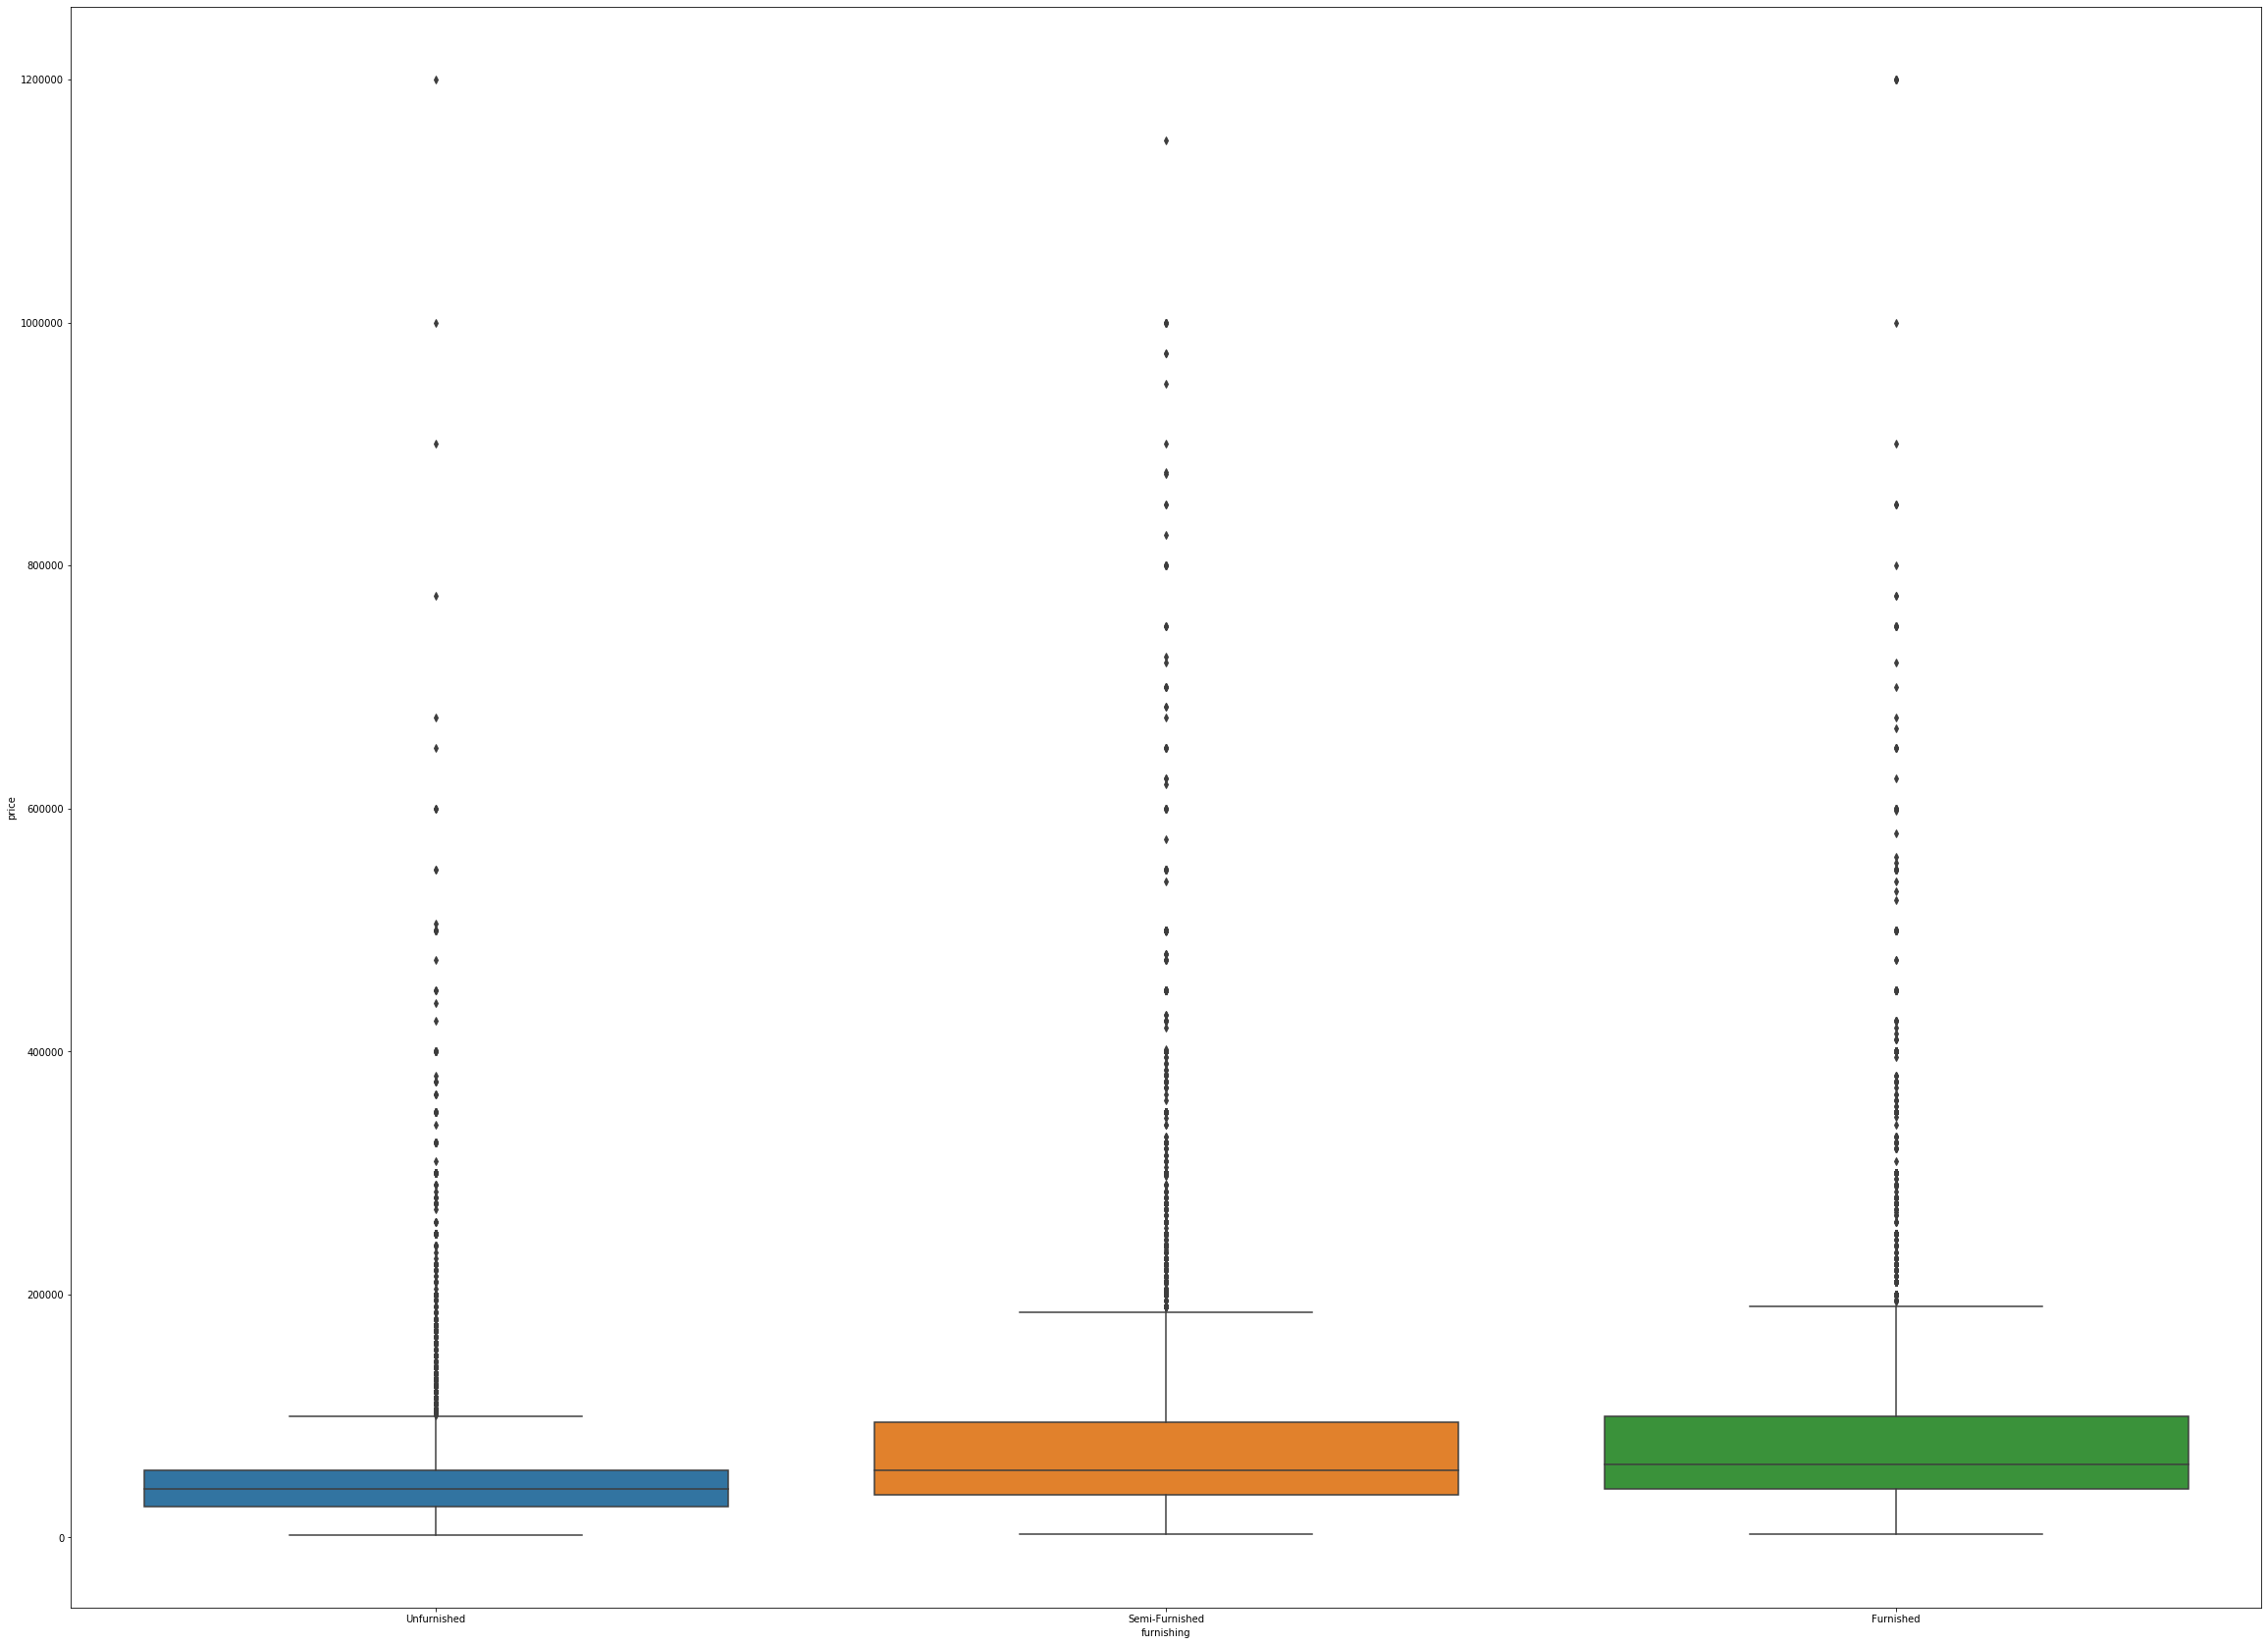

In [13]:
sns.pairplot(df2)
plt.figure(figsize = (40, 30))
sns.boxplot(x = 'furnishing', y = 'price', data = df2)


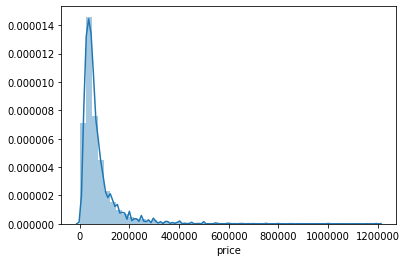

In [14]:
sns.distplot(df2['price'])


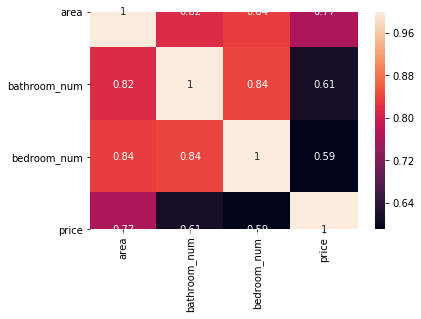

In [15]:
sns.heatmap(df2.corr(), annot= True, annot_kws={'size':10}, xticklabels= True, yticklabels= True)

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

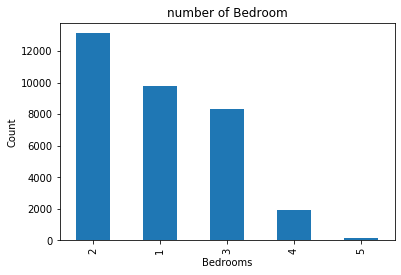

In [16]:
df2['bedroom_num'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

# Dimesionality Reduction
### Dimensionality reduction is simply a process of reducing the dimension( or number of random variables) of your feature set

In [17]:
location = df2['locality'].value_counts() #Return a Series containing counts of unique values.
location


Powai                           1453
Chembur                         1400
Andheri West                    1359
Andheri East                    1092
Worli                           1006
                                ... 
Azad Nagar JJC                     1
Bhandarwada                        1
Gondavali Gaothan                  1
Police Colony Worli Sea Face       1
Thakkar Estate                     1
Name: locality, Length: 821, dtype: int64

In [18]:
#Total number unique location categories are
location.values.sum()

33346

In [19]:
len(location)

821

In [20]:
len(location[location>10])

274

In [21]:
len(location[location<=10])

547

In [22]:
#Get total number of categories where data points are less than 10
location_stats_less_than_10 = location[location<=10]
location_stats_less_than_10

Sion Hospital Colony            10
Pleasant Park                   10
Garodia Nagar                   10
Mehboob Studio                  10
Khar                            10
                                ..
Azad Nagar JJC                   1
Bhandarwada                      1
Gondavali Gaothan                1
Police Colony Worli Sea Face     1
Thakkar Estate                   1
Name: locality, Length: 547, dtype: int64

In [23]:
len(df2.locality.unique())

821

#### Using lambda function assign the 'other' type to every element in 'location_stats_less_than_10'

In [24]:
df3=df2.copy()
df3.locality = df2.locality.apply(lambda x: "other" if x in location_stats_less_than_10 else x)
df3.head(10)

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner
5,630.0,2.0,1,Unfurnished,Virar West,8000,Agent
6,690.0,2.0,1,Furnished,Virar,8500,Agent
7,338.0,1.0,1,Unfurnished,Royal Palms Estate,10000,Agent
8,675.0,2.0,1,Furnished,Virar,9000,Agent
9,500.0,1.0,1,Semi-Furnished,Virar West,8000,Agent


In [25]:
len(df3.locality.unique())


275

In [26]:
df3.head(10)

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner
5,630.0,2.0,1,Unfurnished,Virar West,8000,Agent
6,690.0,2.0,1,Furnished,Virar,8500,Agent
7,338.0,1.0,1,Unfurnished,Royal Palms Estate,10000,Agent
8,675.0,2.0,1,Furnished,Virar,9000,Agent
9,500.0,1.0,1,Semi-Furnished,Virar West,8000,Agent


In [27]:
df3['furnishing'].unique()


array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [28]:
df3.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner


# Feature Engineering

In [29]:
df3['price_per_sqft'] = df3['price']/df3['area']
df3.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type,price_per_sqft
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent,25.714286
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent,12.361963
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent,12.598425
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent,14.814815
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner,14.400000


In [30]:
df3_stats = df3['price_per_sqft'].describe()
df3_stats

count    33346.000000
mean        58.737641
std        154.744405
min          2.812500
25%         38.095238
50%         49.404753
75%         68.000000
max      20000.000000
Name: price_per_sqft, dtype: float64

In [31]:
df3.to_csv("mumbai_home_price.csv",index=False)
df3.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type,price_per_sqft
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent,25.714286
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent,12.361963
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent,12.598425
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent,14.814815
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner,14.400000


In [32]:
df3['bedroom_num'].value_counts()

2    13127
1     9803
3     8351
4     1902
5      163
Name: bedroom_num, dtype: int64

In [33]:
bathroom_stat = df3['bathroom_num'].value_counts()
bathroom_stat

2.0    18320
3.0     6626
1.0     5773
4.0     1950
5.0      549
6.0      121
7.0        4
8.0        3
Name: bathroom_num, dtype: int64

In [34]:
bathroom_stat_greater_six = bathroom_stat[bathroom_stat<=4]
bathroom_stat_greater_six

7.0    4
8.0    3
Name: bathroom_num, dtype: int64

#### Lets visualize the data where square fit per bedroom is less than 300

In [35]:
df3[df3.area/df3.bedroom_num<300].head(20)
df3.price_per_sqft.describe()
df3.shape

(33346, 8)

In [36]:
df4 = df3.copy()
df4.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type,price_per_sqft
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent,25.714286
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent,12.361963
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent,12.598425
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent,14.814815
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner,14.400000


In [37]:
temp = df4[df4.area/df4.bedroom_num<200]
len(temp)

36

In [38]:
df4.shape


(33346, 8)

In [39]:
df5 = df4[~(df4.area/df4.bedroom_num<200)]
df5.shape

(33310, 8)

In [40]:
df5['price_per_sqft'].describe()
df6 = df5.copy()
df6.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type,price_per_sqft
0,350.0,2.0,1,Unfurnished,Malad West,9000,Agent,25.714286
1,652.0,2.0,1,Semi-Furnished,Vasai,8060,Agent,12.361963
2,635.0,2.0,1,Semi-Furnished,Virar,8000,Agent,12.598425
3,540.0,2.0,1,Semi-Furnished,Vasai East,8000,Agent,14.814815
4,625.0,1.0,1,Furnished,Naigaon East,9000,Owner,14.400000


In [41]:
df6.shape

(33310, 8)

#### Using seaborn for data selection

<Figure size 2880x2160 with 0 Axes>

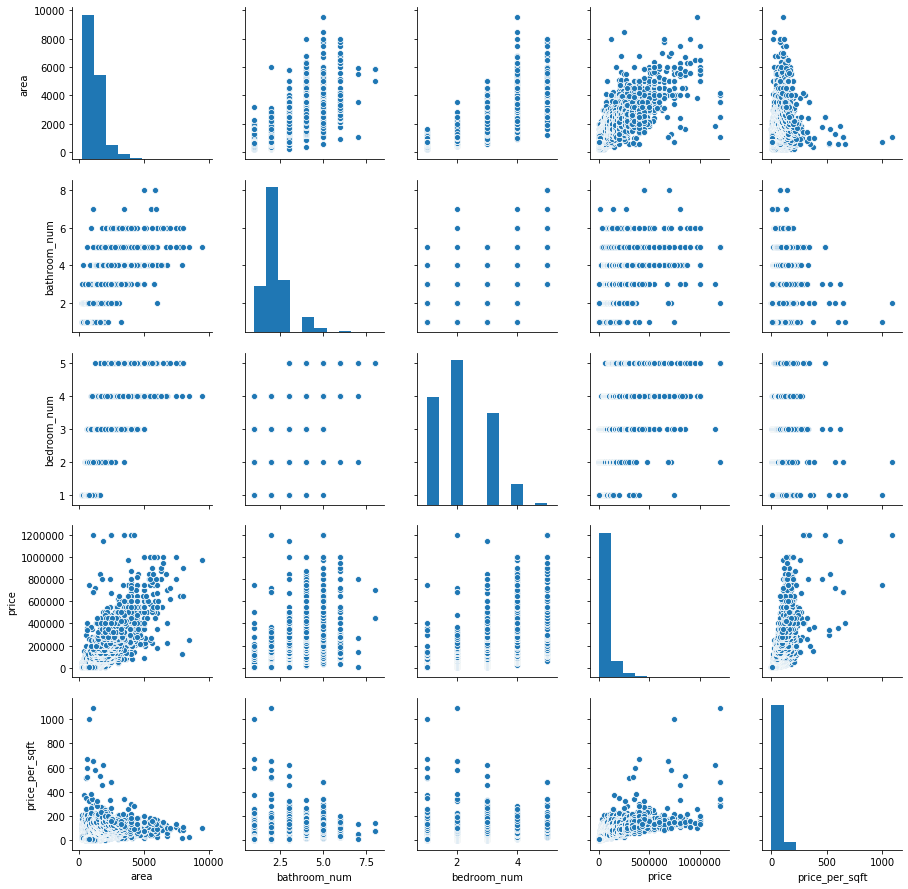

<Figure size 2880x2160 with 0 Axes>

In [42]:
sns.pairplot(df6)
plt.figure(figsize = (40, 30))

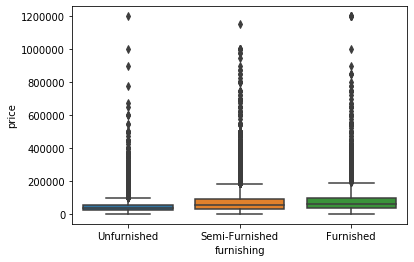

In [43]:
sns.boxplot(x = 'furnishing', y = 'price', data = df6)

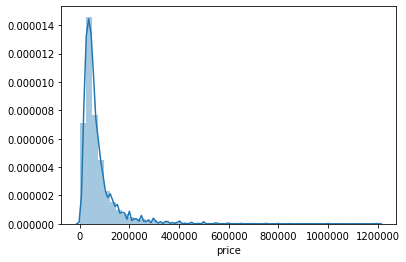

In [44]:
sns.distplot(df6['price'])

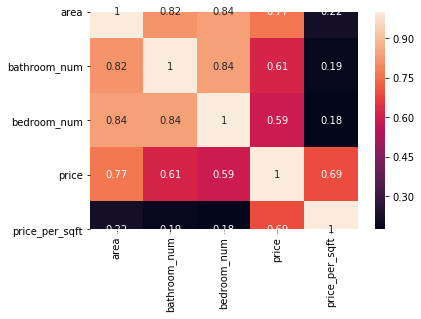

In [45]:
sns.heatmap(df6.corr(), annot= True, annot_kws={'size':10}, xticklabels= True, yticklabels= True)

# Outlier Removal
### An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way.
### Outliers are the data points that represent the extreame variation of dataset
### Outliers can be valid data points but since our model is generalization of the data, outliers can affect the performanace of the model. We are going to remove the otliers, but please note its not always a good practice to remove the outliers.
### To remove the outliers we can use domain knwoledge and standard deviation


# Standard Deviation
### Standard deviation is measure of spread that is to khow how much does the data vary from the average

In [46]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('locality'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(26979, 8)

In [47]:
df7.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type,price_per_sqft
0,2326.0,3.0,4,Unfurnished,4 Bunglows,125000,Agent,53.740327
1,1800.0,4.0,4,Furnished,4 Bunglows,125000,Agent,69.444444
2,2500.0,4.0,4,Semi-Furnished,4 Bunglows,125000,Agent,50.000000
3,2600.0,4.0,4,Semi-Furnished,4 Bunglows,150000,Agent,57.692308
4,2572.0,3.0,4,Semi-Furnished,4 Bunglows,140000,Agent,54.432348


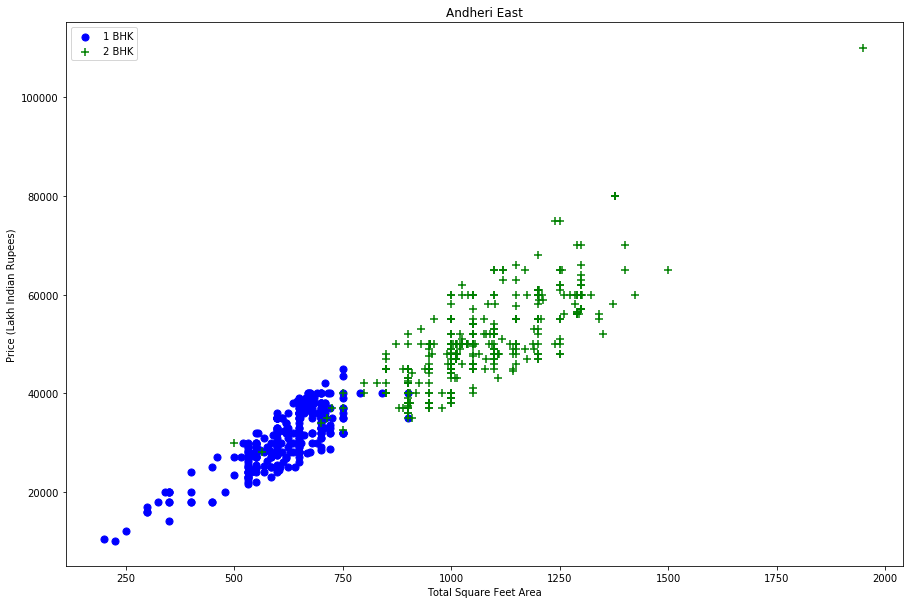

In [48]:
def plot_scatter_chart(df,locality):
    bhk2 = df[(df.locality==locality) & (df.bedroom_num==1)]
    bhk3 = df[(df.locality==locality) & (df.bedroom_num==2)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='1 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='2 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(locality)
    plt.legend()
plot_scatter_chart(df7,"Andheri East")

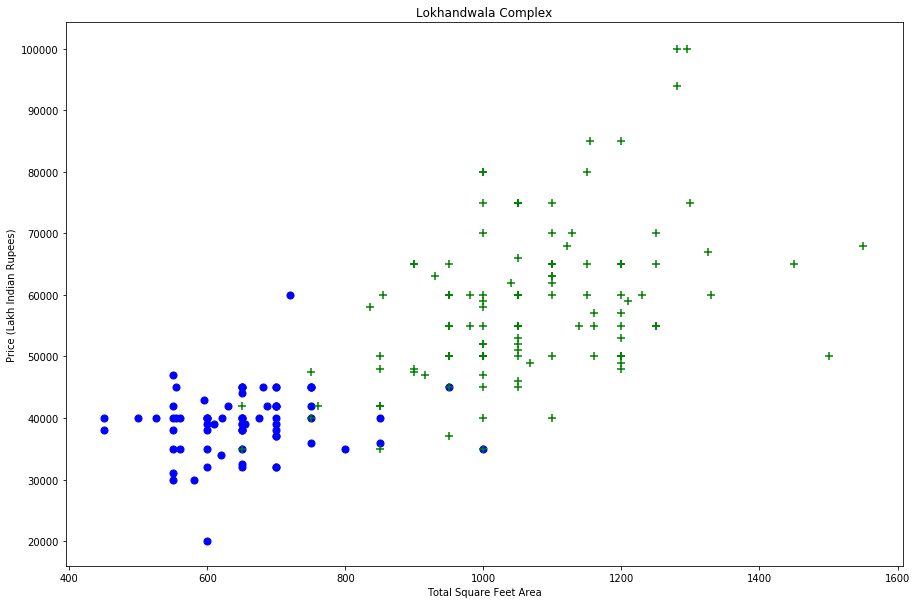

In [49]:
def plot_scatter_chart(df,locality):
    bhk2 = df[(df.locality==locality) & (df.bedroom_num==1)]
    bhk3 = df[(df.locality==locality) & (df.bedroom_num==2)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='1 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='2 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(locality)
    plt.legend
plot_scatter_chart(df7,"Lokhandwala Complex")

In [50]:
df7.shape

(26979, 8)

In [51]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('locality'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedroom_num'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedroom_num'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(16457, 8)

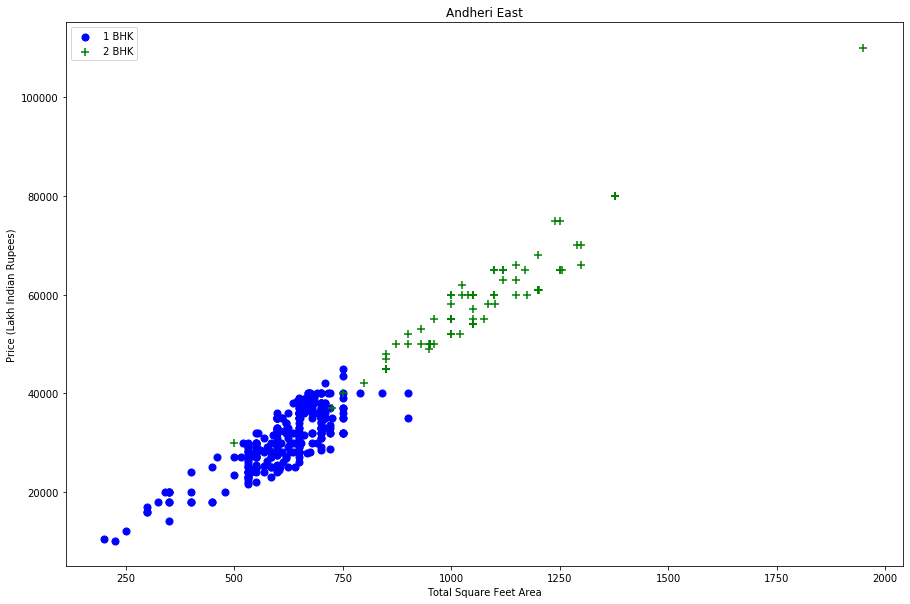

In [52]:
def plot_scatter_chart(df,locality):
    bhk2 = df[(df.locality==locality) & (df.bedroom_num==1)]
    bhk3 = df[(df.locality==locality) & (df.bedroom_num==2)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='1 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='2 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(locality)
    plt.legend()
    
plot_scatter_chart(df8,"Andheri East")

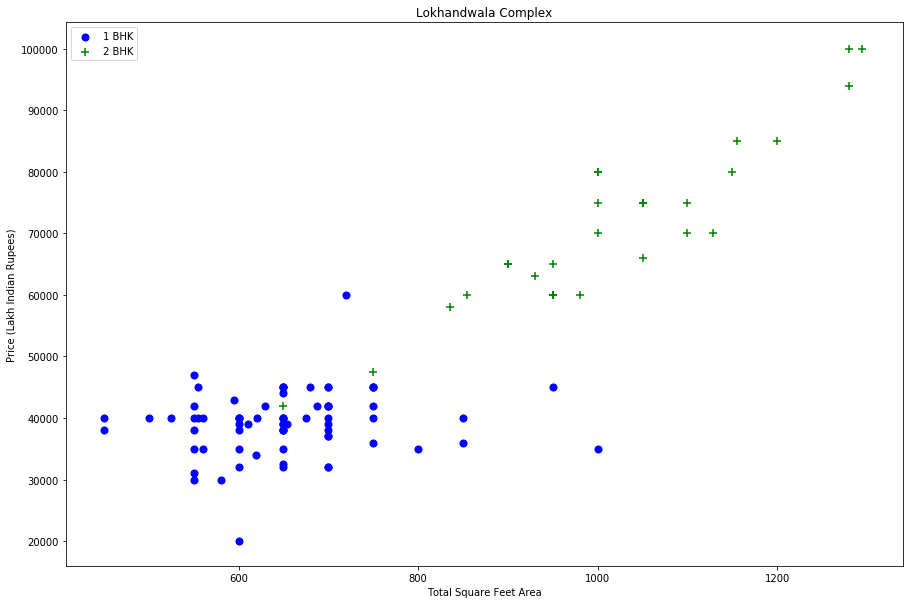

In [53]:
def plot_scatter_chart(df,locality):
    bhk2 = df[(df.locality==locality) & (df.bedroom_num==1)]
    bhk3 = df[(df.locality==locality) & (df.bedroom_num==2)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='1 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='2 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(locality)
    plt.legend()
    
plot_scatter_chart(df8,"Lokhandwala Complex")

In [54]:
df9 = df8.copy()
df9.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type,price_per_sqft
1,1800.0,4.0,4,Furnished,4 Bunglows,125000,Agent,69.444444
3,2600.0,4.0,4,Semi-Furnished,4 Bunglows,150000,Agent,57.692308
5,2572.0,4.0,4,Unfurnished,4 Bunglows,165000,Agent,64.152411
6,2400.0,4.0,4,Unfurnished,4 Bunglows,165000,Agent,68.750000
7,450.0,1.0,1,Unfurnished,4 Bunglows,23000,Agent,51.111111


# Now lets plot the histogram and visualize the price_per_sqft data after outlier removal

Text(0, 0.5, 'Count')

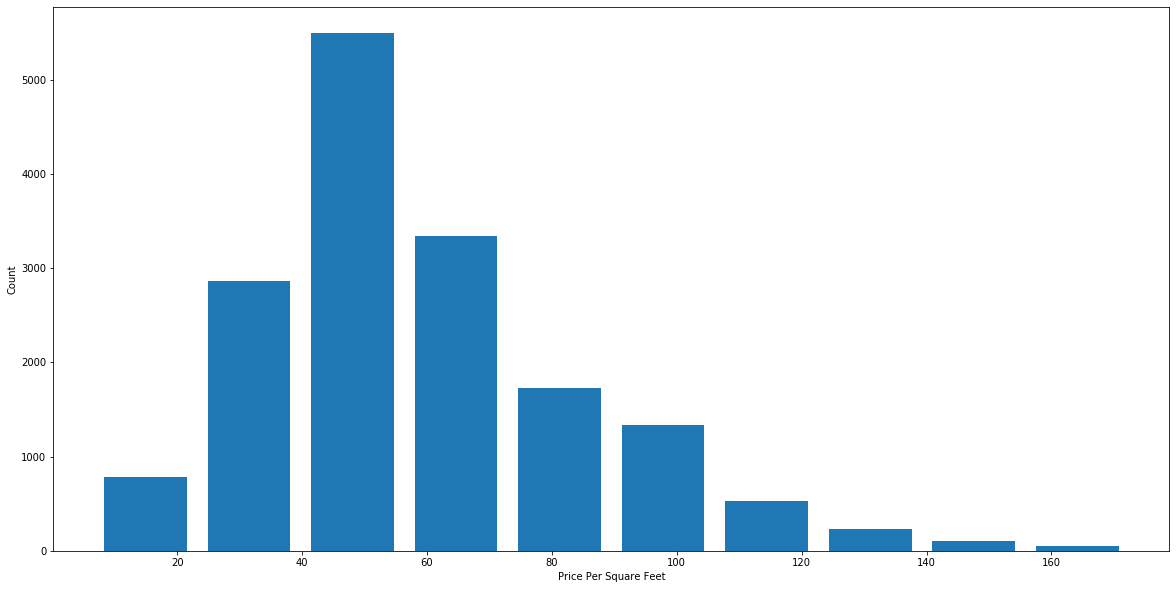

In [55]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


# Using domain knowledge for outlier removal

### Generally number of bathrooms per BHK are (no of BHK) + 2.

In [56]:
df9['bathroom_num'].unique()


array([4., 1., 2., 3., 6., 5., 7.])

### Get the training examples where no of bath are more than (no of BHK +2)

In [57]:
df9[df9['bathroom_num']>df9['bedroom_num']+2]
df9.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price,user_type,price_per_sqft
1,1800.0,4.0,4,Furnished,4 Bunglows,125000,Agent,69.444444
3,2600.0,4.0,4,Semi-Furnished,4 Bunglows,150000,Agent,57.692308
5,2572.0,4.0,4,Unfurnished,4 Bunglows,165000,Agent,64.152411
6,2400.0,4.0,4,Unfurnished,4 Bunglows,165000,Agent,68.750000
7,450.0,1.0,1,Unfurnished,4 Bunglows,23000,Agent,51.111111


### Remove the outliers with more than (no of BHK + 2) bathrooms

In [58]:
df9 = df9[df9['bathroom_num']<df9['bedroom_num']+2]
df9.shape

(16376, 8)

# This concludes our data cleaning, lets drop unnecessary columns
### We have crerated 'price_per_sqft' for outlier detection and removal purpose, so we can also drop it.

In [59]:
df10 = df9.drop(['price_per_sqft','user_type'],axis='columns')
df10.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price
1,1800.0,4.0,4,Furnished,4 Bunglows,125000
3,2600.0,4.0,4,Semi-Furnished,4 Bunglows,150000
5,2572.0,4.0,4,Unfurnished,4 Bunglows,165000
6,2400.0,4.0,4,Unfurnished,4 Bunglows,165000
7,450.0,1.0,1,Unfurnished,4 Bunglows,23000


In [60]:
df10['furnishing'].unique()

array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object)

In [61]:
df11 = df10.copy()

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [63]:
df11['furnishing']= le.fit_transform(df10['furnishing']) 
df11['furnishing'].unique()

array([0, 1, 2], dtype=int64)

In [64]:
df11.head()

,area,bathroom_num,bedroom_num,furnishing,locality,price
1,1800.0,4.0,4,0,4 Bunglows,125000
3,2600.0,4.0,4,1,4 Bunglows,150000
5,2572.0,4.0,4,2,4 Bunglows,165000
6,2400.0,4.0,4,2,4 Bunglows,165000
7,450.0,1.0,1,2,4 Bunglows,23000


### since we have locality as categorical feature we use one hot encoding to create seperate column for each location category and assign binary value 1 or 0


In [65]:
dummies = pd.get_dummies(df11.locality)
dummies.head(3)


,4 Bunglows,Aarey Milk Colony,Abhinav Nagar,Agripada,Akurli Nagar,Alika Nagar,Altamount Road,Amboli,Andheri East,Andheri West,...,Walkeshwar,Waterfield Road,World Trade Centre,Worli,Worli Hill,Worli Naka Acharaya Atre Chowk,Worli Sea Face,Yari Road,Yeshodham,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Now lets add dummies dataframe to original dataframe

In [66]:

df11 = pd.concat([df11,dummies.drop('other',axis='columns')],axis='columns')
df11.head()


,area,bathroom_num,bedroom_num,furnishing,locality,price,4 Bunglows,Aarey Milk Colony,Abhinav Nagar,Agripada,...,Wadala West,Walkeshwar,Waterfield Road,World Trade Centre,Worli,Worli Hill,Worli Naka Acharaya Atre Chowk,Worli Sea Face,Yari Road,Yeshodham
1,1800.0,4.0,4,0,4 Bunglows,125000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2600.0,4.0,4,1,4 Bunglows,150000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2572.0,4.0,4,2,4 Bunglows,165000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2400.0,4.0,4,2,4 Bunglows,165000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,450.0,1.0,1,2,4 Bunglows,23000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### To avoid dummy variable trap problem lets delete the one of the dummy variable column

In [67]:

df12 = df11.drop('locality',axis='columns')
df12.head(2)


,area,bathroom_num,bedroom_num,furnishing,price,4 Bunglows,Aarey Milk Colony,Abhinav Nagar,Agripada,Akurli Nagar,...,Wadala West,Walkeshwar,Waterfield Road,World Trade Centre,Worli,Worli Hill,Worli Naka Acharaya Atre Chowk,Worli Sea Face,Yari Road,Yeshodham
1,1800.0,4.0,4,0,125000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2600.0,4.0,4,1,150000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df12.shape

(16376, 279)

### Now leats create X(independent variable/features) and y(dependent variables/target)

In [69]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,area,bathroom_num,bedroom_num,furnishing,4 Bunglows,Aarey Milk Colony,Abhinav Nagar,Agripada,Akurli Nagar,Alika Nagar,...,Wadala West,Walkeshwar,Waterfield Road,World Trade Centre,Worli,Worli Hill,Worli Naka Acharaya Atre Chowk,Worli Sea Face,Yari Road,Yeshodham
1,1800.0,4.0,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2600.0,4.0,4,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2572.0,4.0,4,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
X.shape

(16376, 278)

In [71]:
y = df12.price
y.head(3)

1    125000
3    150000
5    165000
Name: price, dtype: int64

In [72]:
len(y)

16376

# Split the dataset to training andtest dataset

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# Linear Regression
#### fitting the model


In [74]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

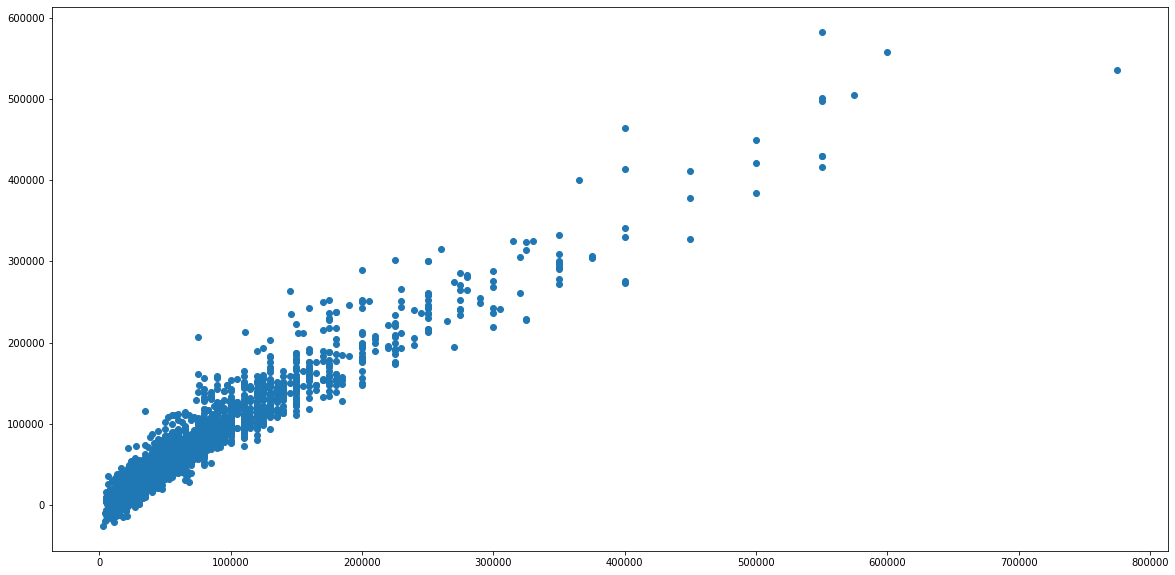

In [75]:
#Predictions from our Linear Regression Model
predictions = lr.predict(X_test)
plt.scatter(y_test,predictions)

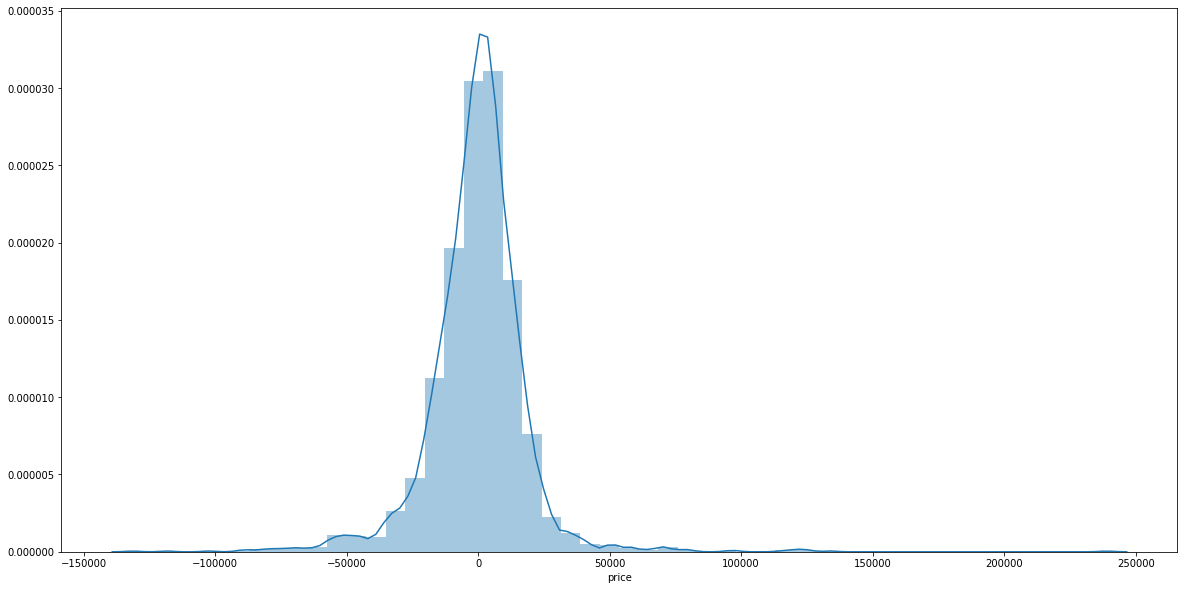

In [76]:
sns.distplot((y_test-predictions),bins=50);

# Use K Fold cross validation to measure accuracy of our LinearRegression model
#### Using Sklearn cross_val_score function

In [77]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

### ShuffleSplit is used to randomize the each fold

In [78]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.91354337, 0.91321954, 0.91264911, 0.91376545, 0.90433215])

# GridSearchCV
### From above scores its clear that with LinearRegresion we get max score of upto 91%
### Lets use GridSearchCV to test other regression algorithm

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [80]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.911502,{'normalize': False}
1,lasso,0.911442,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.896904,"{'criterion': 'mse', 'splitter': 'best'}"


# Predictions from our Linear Regression Model

### Test the model for few properties
### Since all our locations are now columns in form of dummy variabales, all other dummy variables value should be 0 except the one(dummy variable column for our location) we are predicting for
### This(np.where(X.columns==location)[0][0]) code will give us index of dummy column for our location
### Now we will assign value '1' to this index and keep all other dummy variable columns as '0'

In [81]:
def predict_price(locality, area, bathroom_num, bedroom_num):    
    loc_index = np.where(X.columns==locality)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = bathroom_num
    x[2] = bedroom_num
    if loc_index >= 0:
        x[loc_index] = 1
    return lr.predict([x])[0]


In [82]:

predict_price('4 Bunglows',700, 2, 2)


25408.573698194545

In [83]:
predict_price('Aarey Milk Colony',700, 2, 2)


23051.40176222435

In [84]:
predict_price("Abhinav Nagar",450, 1, 1)

2437.3790436900526

In [85]:
df12.head(20)

,area,bathroom_num,bedroom_num,furnishing,price,4 Bunglows,Aarey Milk Colony,Abhinav Nagar,Agripada,Akurli Nagar,...,Wadala West,Walkeshwar,Waterfield Road,World Trade Centre,Worli,Worli Hill,Worli Naka Acharaya Atre Chowk,Worli Sea Face,Yari Road,Yeshodham
1,1800.0,4.0,4,0,125000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2600.0,4.0,4,1,150000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2572.0,4.0,4,2,165000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2400.0,4.0,4,2,165000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,450.0,1.0,1,2,23000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,498.0,2.0,1,1,29000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,603.0,2.0,1,2,30000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,575.0,2.0,1,1,29000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,600.0,1.0,1,0,30000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,650.0,2.0,1,1,34000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Evaluating Model

In [86]:
from sklearn import metrics

In [87]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 12092.660186664649
MSE: 347590329.06303596
RMSE: 18643.77453905287


# Importing model as pickle file

In [96]:
import pickle

with open('House_Price_Prediction_Project.pickle','wb') as f:
    pickle.dump(lr,f)